<a href="https://colab.research.google.com/github/coryellj4/4540/blob/main/CS4540Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os


In [14]:
# Function to load spike times from a given file
def load_spike_times(file_path):
    return np.loadtxt(file_path)

# Function to compute spike counts in given time windows
def compute_spike_counts(spike_times, bin_size, total_time):
    if total_time <= 0:
        print("Warning: Total time is zero or negative.")
        return np.array([])

    bins = np.arange(0, total_time + bin_size, bin_size)  # Ensure at least one bin
    spike_counts, _ = np.histogram(spike_times, bins)

    if len(spike_counts) == 0:
        print("Warning: No spikes found in any bin. Check bin size or total time.")

    return spike_counts

# Function to compute inter-spike intervals (ISI)
def compute_isi(spike_times):
    return np.diff(spike_times)

# Function to estimate Poisson parameter using MLE
def estimate_poisson_lambda(spike_counts):
    return np.mean(spike_counts)

# Function to estimate Exponential parameter using MLE
def estimate_exponential_lambda(isi_values):
    return 1 / np.mean(isi_values)

# Function to plot histogram and fitted distribution
def plot_distribution(data, dist_name, dist_fit, xlabel, ylabel, bins=20):
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='g', label='Data Histogram')
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, dist_fit(x), 'r-', lw=2, label=f'Fitted {dist_name} Distribution')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [15]:
# Example file paths (Update with actual paths)
spike_files = ["/content/ec012ec.187.res.1", "/content/ec012ec.228.res.1", "/content/ec012ec.375.res.1"]

# Parameters
sampling_rate = 20000  # 20 kHz
bin_size = 0.1 * sampling_rate  # 100 ms bins

File: /content/ec012ec.187.res.1
Poisson MLE λ: 89148.0, Sample Mean: 89148.0, Fano Factor: 0.0


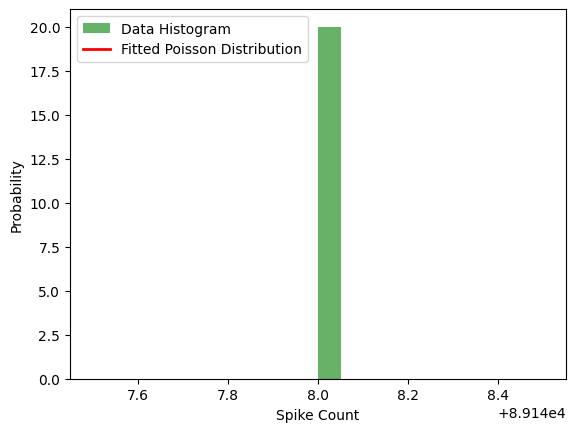

Exponential MLE λ: 81.30958162372626, Sample Mean: 0.012298673539210518


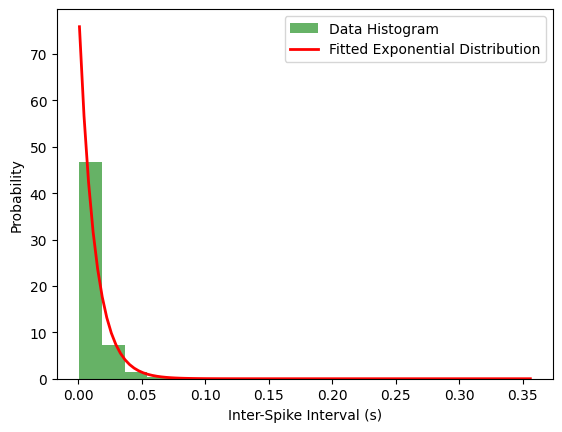

File: /content/ec012ec.228.res.1
Poisson MLE λ: 144189.0, Sample Mean: 144189.0, Fano Factor: 0.0


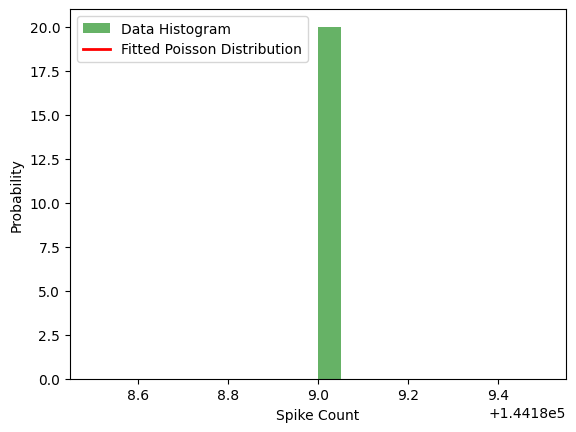

Exponential MLE λ: 129.99434044808055, Sample Mean: 0.007692642591616501


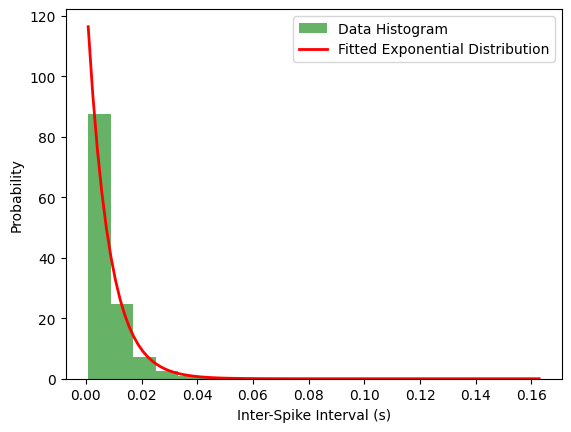

File: /content/ec012ec.375.res.1
Poisson MLE λ: 77870.0, Sample Mean: 77870.0, Fano Factor: 0.0


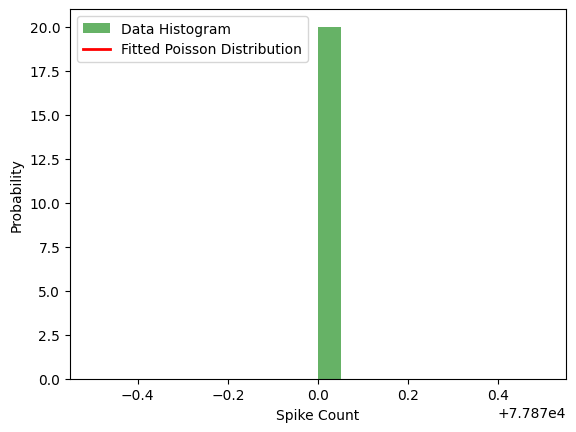

Exponential MLE λ: 123.36898780362993, Sample Mean: 0.008105764810129833


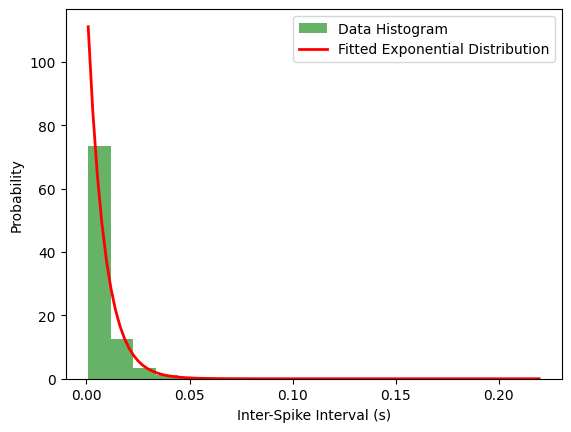

In [16]:
for file in spike_files:
    spike_times = load_spike_times(file)
    spike_times = spike_times / sampling_rate  # Convert to seconds
    total_time = spike_times[-1]

    # Poisson Analysis
    spike_counts = compute_spike_counts(spike_times, bin_size, total_time)
    lambda_poisson = estimate_poisson_lambda(spike_counts)
    fano_factor = np.var(spike_counts) / lambda_poisson

    print(f"File: {file}")
    print(f"Poisson MLE λ: {lambda_poisson}, Sample Mean: {np.mean(spike_counts)}, Fano Factor: {fano_factor}")

    plot_distribution(spike_counts, "Poisson",lambda x: stats.poisson.pmf(np.round(x), lambda_poisson),"Spike Count", "Probability")

    # Exponential Analysis
    isi_values = compute_isi(spike_times)
    lambda_exponential = estimate_exponential_lambda(isi_values)

    print(f"Exponential MLE λ: {lambda_exponential}, Sample Mean: {np.mean(isi_values)}")

    plot_distribution(
        isi_values, "Exponential",
        lambda x: lambda_exponential * np.exp(-lambda_exponential * x),
        "Inter-Spike Interval (s)", "Probability"
    )
